<a href="https://colab.research.google.com/github/vachaconcu/Mineriadatos/blob/master/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos


In [11]:
import os
from numpy import load
os.chdir('/content/drive/My Drive/Mineria/Interna/datos/Modelos')

datos= load('/content/drive/My Drive/Mineria/Interna/datos/X_HM_val_int.npz') ; x_test = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/X_HM_train.npz') ; x_train = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_HM_val_int.npz') ; y_test_s = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_HM_train.npz') ; y_train_s = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_HM_val_ext.npz') ; y_test2_s = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/X_HM_val_ext.npz') ; x_test2 = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_R_val_int.npz') ; y_test_r = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_R_train.npz') ; y_train_r = datos['arr_0']
datos= load('/content/drive/My Drive/Mineria/Interna/datos/y_R_val_ext.npz') ; y_test2_r = datos['arr_0']


#Carga de modelo final para sexo

In [7]:
from tensorflow.keras.models import load_model

models = load_model('/content/drive/My Drive/Mineria/Interna/datos/Modelos/Sexo_Segunda_vale_0.7_ResNet20v2_model.027.h5')

# Carga de modelo final para raza

In [8]:
modelr= load_model('/content/drive/My Drive/Mineria/Interna/datos/Modelos/Modelos/Raza_Segunda_vale_0.1_ResNet20v2_model.028.h5')

In [12]:
scores = modelr.evaluate(x_test2,
                        y_test2_r,
                        batch_size=32,
                        verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 3.306201696395874
Test accuracy: 0.3165293335914612


# Imagenes de prueba

In [14]:
probs=models.predict(x_test2[100:120])
probr=modelr.predict(x_test2[100:120])

In [46]:
import numpy as np
r=[]
for i in range(0,20):
  a = np.argmax(probr[i])
  r.append(a)

s=[]
for i in range(0,20):
  a = np.argmax(probs[i])
  s.append(a)

In [47]:
verdaderor=[]
for i in range(0,20):
  a = np.argmax(y_test2_r[100+i])
  verdaderor.append(a)
verdaderos=[]
for i in range(0,20):
  a = np.argmax(y_test2_s[100+i])
  verdaderos.append(a)

In [55]:
import pandas as pd
bien= []
medio= []
mal = []
for i in  range(0,20):
  if verdaderor[i]==r[i]: 
      if verdaderos[i]==s[i]:
        bien.append(i+100)
      else: medio.append(i+100)
  else: mal.append(i+100)

In [63]:
mal

[101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118]

[[0.9949955  0.00500456]]
[0 1]
[[0.16293202 0.78842175 0.02054396 0.01622349 0.01187868]]
[0 0 0 1 0]


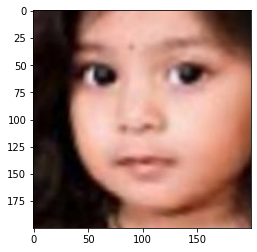

In [66]:
from skimage import io
import matplotlib.pyplot as plt
w=106
Idw=[]
image=x_test2[w]
plt.imshow(image)

Idata=np.array(image)/255
Idw.append(Idata)

x_train_mean = np.mean(x_train, axis=0)
Idw=np.array(Idw)
Idw -= x_train_mean

print(models.predict(Idw[0:1]))
print(y_test2_s[w])
print(modelr.predict(Idw[0:1]))
print(y_test2_r[w])


La imagen tiene forma:  (1, 200, 200, 3) 

[[[0.75686275 0.75686275 0.70980392]
  [0.73333333 0.73333333 0.68627451]
  [0.72941176 0.72941176 0.68235294]
  ...
  [0.35294118 0.28627451 0.25490196]
  [0.37647059 0.30980392 0.27843137]
  [0.36078431 0.30588235 0.27058824]]

 [[0.75294118 0.75294118 0.71372549]
  [0.73333333 0.73333333 0.68627451]
  [0.71764706 0.71764706 0.67058824]
  ...
  [0.38823529 0.32156863 0.29019608]
  [0.34509804 0.29019608 0.25490196]
  [0.34117647 0.28627451 0.25098039]]

 [[0.74509804 0.74509804 0.69803922]
  [0.72941176 0.72941176 0.68235294]
  [0.71764706 0.71764706 0.67058824]
  ...
  [0.3254902  0.27058824 0.23529412]
  [0.36078431 0.30588235 0.27058824]
  [0.38039216 0.3254902  0.29019608]]

 ...

 [[0.8745098  0.87058824 0.8       ]
  [0.84705882 0.84313725 0.76470588]
  [0.8627451  0.87058824 0.78823529]
  ...
  [0.16470588 0.18823529 0.24313725]
  [0.16470588 0.19607843 0.24705882]
  [0.16862745 0.19607843 0.25882353]]

 [[0.84313725 0.83921569 0.768

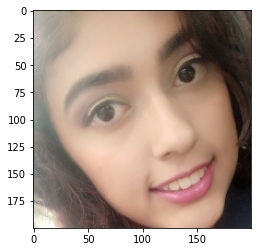

In [67]:
from skimage import io
import matplotlib.pyplot as plt
Idw=[]
image=io.imread('/content/drive/My Drive/imma.jpg')
plt.imshow(image)

Idata=np.array(image)/255
Idw.append(Idata)

x_train_mean = np.mean(x_train, axis=0)
Idw=np.array(Idw)
Idw -= x_train_mean

print("\nLa imagen tiene forma: ",Idw.shape,"\n")
print(Idata)

In [68]:
models.predict(Idw[0:1])

array([[0.00305211, 0.99694794]], dtype=float32)

In [69]:
modelr.predict(Idw[0:1])

array([[0.7195487 , 0.00158367, 0.00105388, 0.09453403, 0.18327975]],
      dtype=float32)

In [43]:
bien

[0, 3, 15, 19]